After performing the EDA and answer the question. I am going to perform a model to predict the price of certain typer of cars 

### 1. Importing dependencies

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

In [13]:
cars_data = pd.read_excel('output.xlsx')

In [14]:
cars_data

,Unnamed: 0,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10379,11909,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,Midsize,4dr Hatchback,23,16,204,46120
10380,11910,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,Midsize,4dr Hatchback,23,16,204,56670
10381,11911,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,Midsize,4dr Hatchback,23,16,204,50620
10382,11912,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,Midsize,4dr Hatchback,23,16,204,50920


## 2. Preprocessing

In [ ]:
# Feature encoding: Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values into numerical values

In [18]:
cat_features = ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style']

In [25]:
cars_data = pd.get_dummies(cars_data, columns = cat_features)
cars_data.head()

,Unnamed: 0,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Acura,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,0,2011,335,6,2,26,19,3916,46135,False,...,False,False,True,False,False,False,False,False,False,False
1,1,2011,300,6,2,28,19,3916,40650,False,...,True,False,False,False,False,False,False,False,False,False
2,2,2011,300,6,2,28,20,3916,36350,False,...,False,False,True,False,False,False,False,False,False,False
3,3,2011,230,6,2,28,18,3916,29450,False,...,False,False,True,False,False,False,False,False,False,False
4,4,2011,230,6,2,28,18,3916,34500,False,...,True,False,False,False,False,False,False,False,False,False


Splitting the dataset into train and test

In [28]:
X = cars_data.drop('msrp',axis = 1)
y = cars_data['msrp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Now, we should do normalization or standardize my data by using Standard Scaler

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3. Modelling

It has been recommended to use a random forest regressor model to the dataset.

In [30]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(X_train, y_train)
rfr_pred = rfr_algo.predict(X_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score is :  0.9709733646011416
Mean squared error is :  4864.080786923705


We are gonna make it visual

<Axes: xlabel='msrp', ylabel='Predicted Value'>

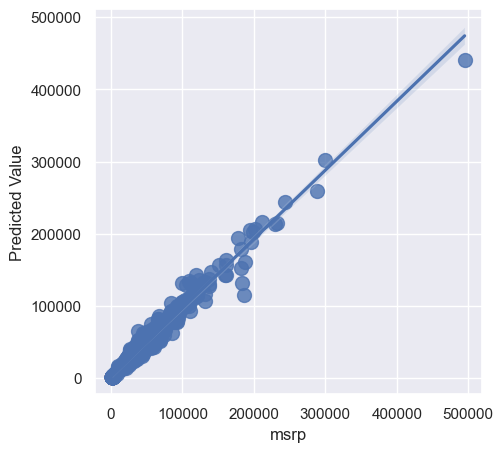

In [37]:
plt.figure(figsize=(5,5))
plt.ylabel("Predicted Value")
sns.regplot(x = y_test, y = rfr_pred, fit_reg=True, scatter_kws={"s": 100})

The perfom went well with r2 = 0.97